In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [28]:
def angleCorloredTrajectory(x_gauss, y_gauss, circ_r, angle):
    
    plt.style.use('default')
    
    
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.set_facecolor('black')

    c1 = plt.Circle((0, 0), circ_r, facecolor='linen', alpha = 0.7, 
                    edgecolor='none', zorder = -3)
    ax.add_artist(c1)

    plt.scatter(x_gauss, y_gauss, s=7 , c = angle, cmap = plt.cm.cool, 
               zorder = 1)
    ax.set_aspect('equal', adjustable = 'datalim')
    ax.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)

    cbar = plt.colorbar()
    
    return(fig)

def angleColoredSweepCurves(r_gauss, circ_r, angle):
    fig = plt.subplots(figsize = (5,5))
    t0 = np.arange(len(r_gauss))*1/100
    plt.scatter(t0, r_gauss/circ_r, s = 10,
                c = angle, cmap = plt.cm.jet)
    cbar = plt.colorbar()
    return(fig)

In [2]:
data_path = './dataFolders/FinalTracking_xypts/AngleAndRadiusIncluded/v1/'

In [4]:
# datalist = glob.glob(data_path + '**.csv')
circ_parameters = pd.read_csv('./dataFolders/circle_parameters.csv')

In [5]:
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

In [6]:
handpicked = ['c-1_m13',
              'c-2_m11',
              'c-3_m10',
              'c-10_m11']

In [7]:
# fig_path = './dataFolders/Figures/figuresForDepartmentTalk/'
fig_path = './dataFolders/Figures/DifferentRMSEThresholds/'

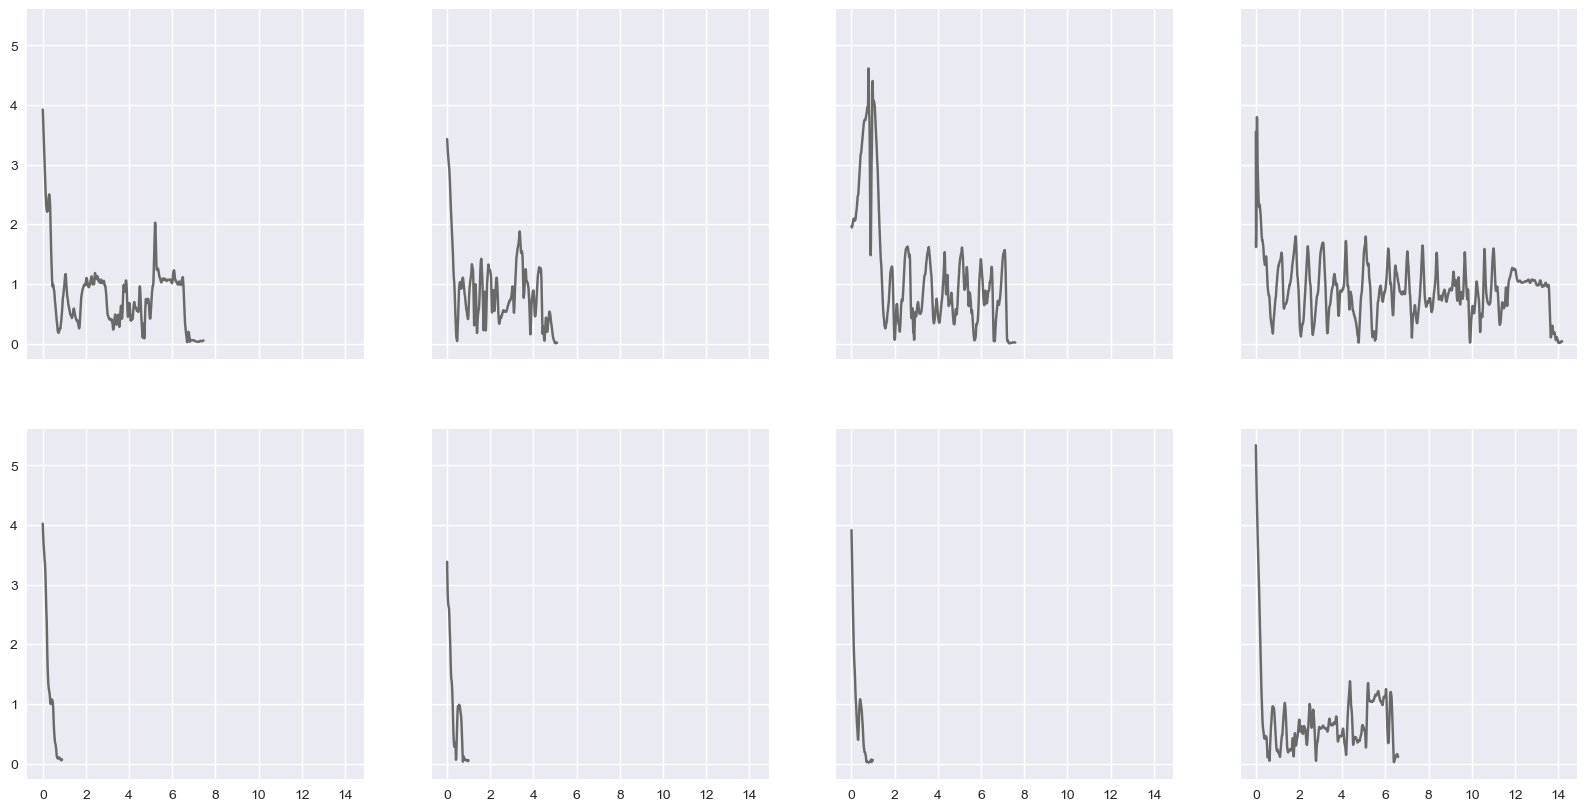

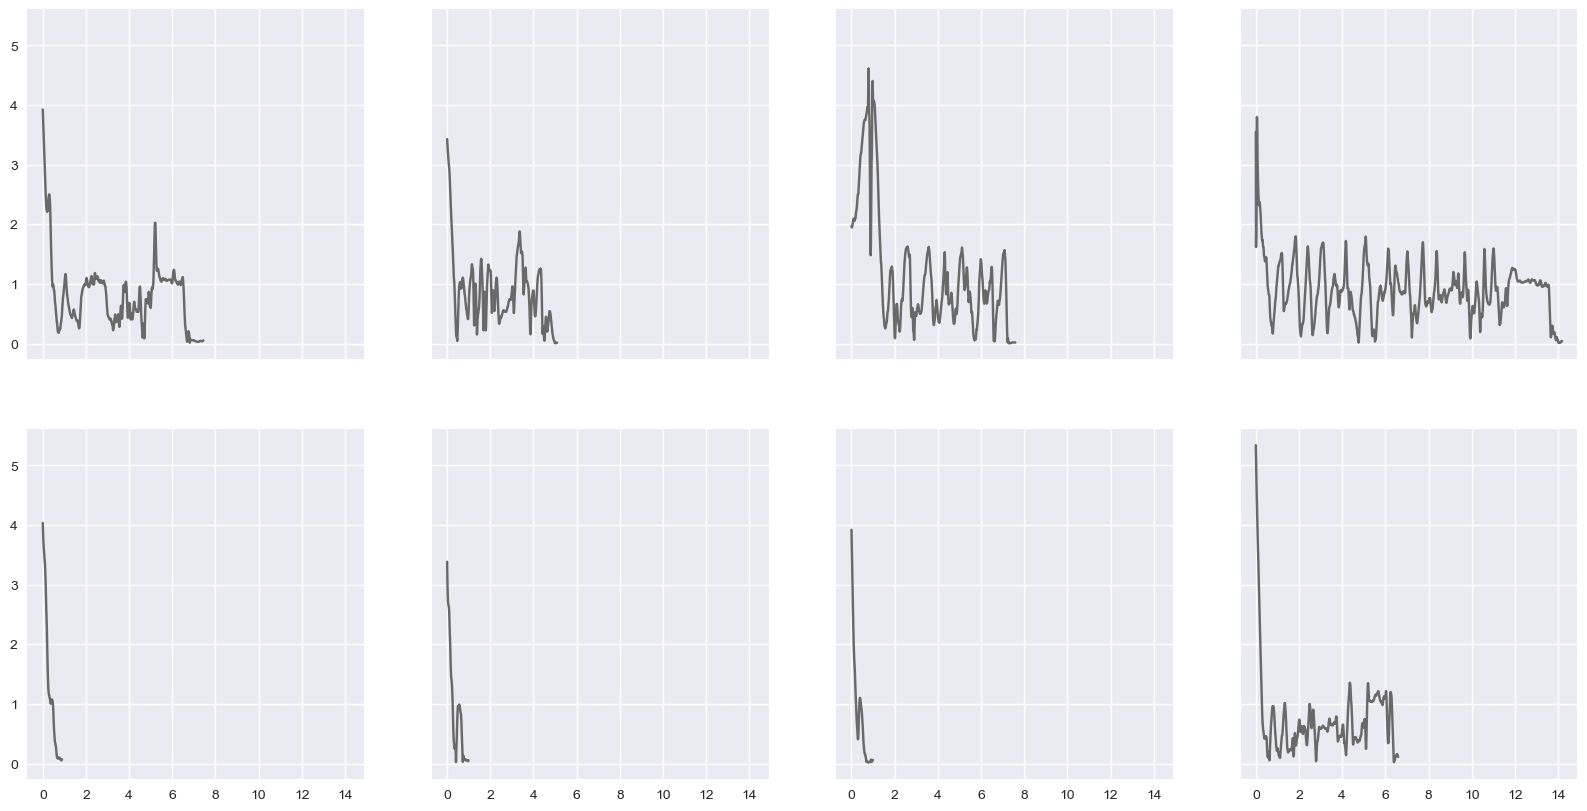

In [35]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    datalist = glob.glob(data_path + cutoff + '/**.csv')
    
    trial = ['first', 'last']

    plt.style.use('seaborn')

    fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)

    cc = 0
    for name in handpicked:
        path = [data for data in datalist if name in data]

        ii = 0
        for tt in trial:
            p = [x for x in path if tt in x][0]

            file = pd.read_csv(p)
            r = file.loc[:,'radial distance savgol'].values
    #       print(ii, cc)
            t = np.arange(0,len(r))
            ax[ii, cc].plot(t*1/100, r, color = 'dimgrey')
            ax[ii, cc].tick_params(axis='both', which='major', labelsize=10)
            ii+=1
        cc+=1


    fig.savefig(fig_path + cutoff + '/radialSweepsAllFlowers.png')

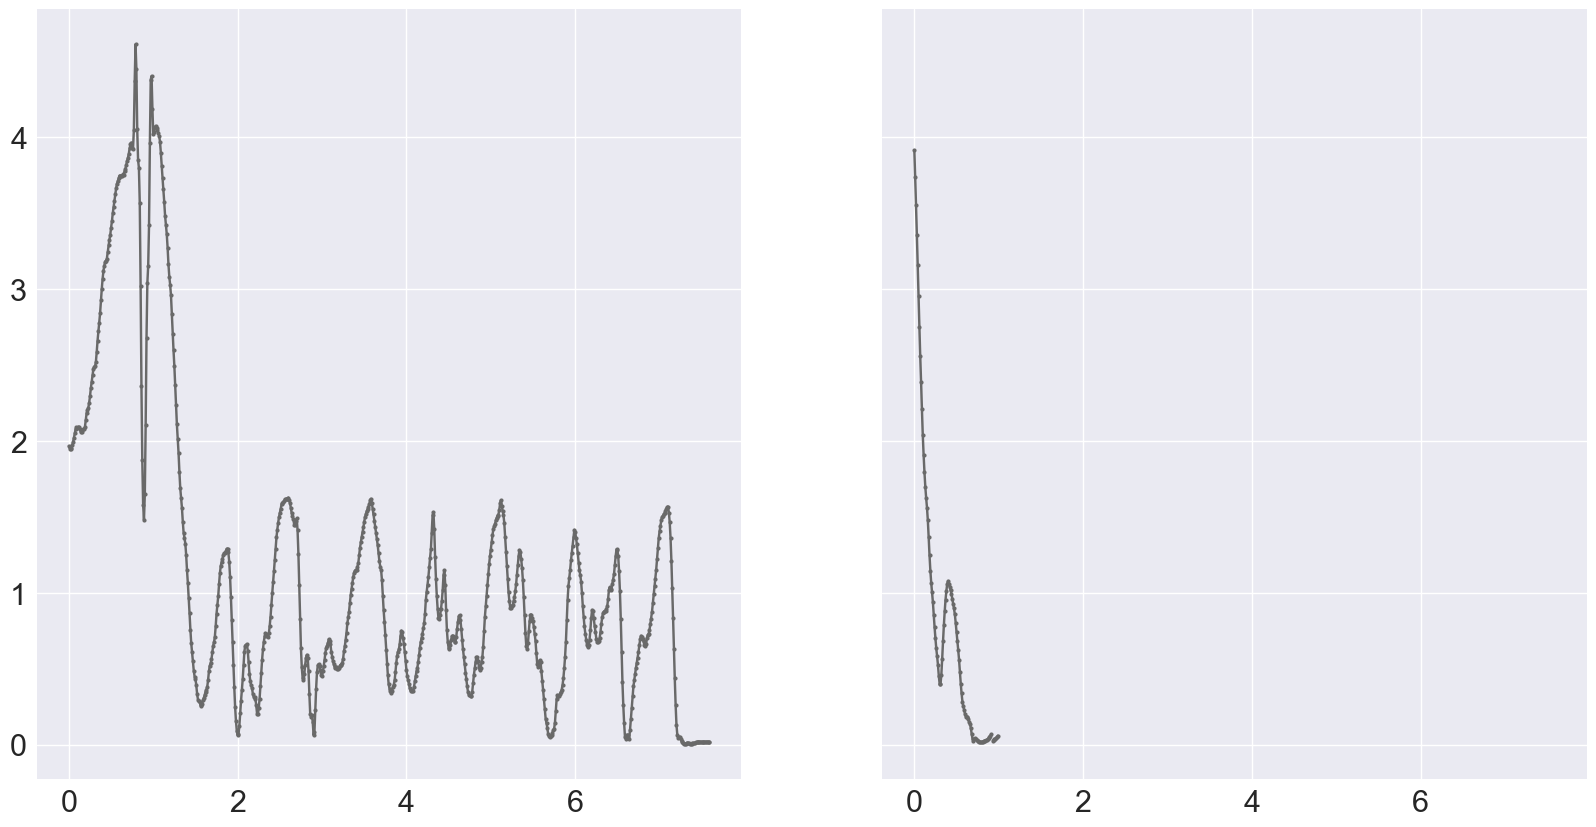

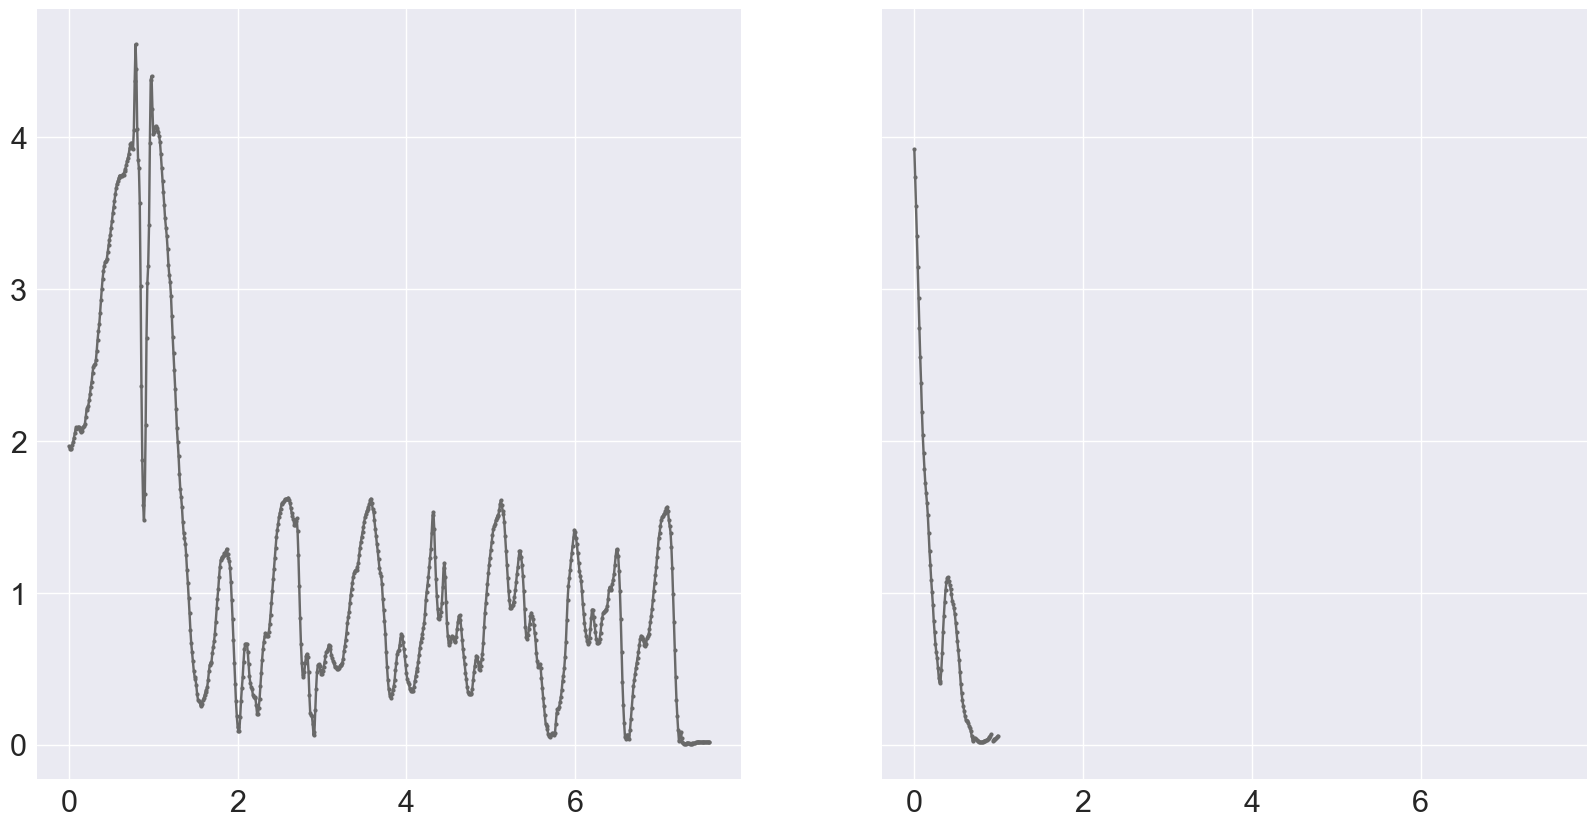

In [36]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    datalist = glob.glob(data_path + cutoff + '/**.csv')
    
    trial = ['first', 'last']

    fig, ax = plt.subplots(1,2, figsize = (20,10), sharex = True, sharey = True)

    cc = 0
    for name in handpicked[2:3]:
        path = [data for data in datalist if name in data]

        ii = 0
        for tt in trial:
            p = [x for x in path if tt in x][0]

            file = pd.read_csv(p)
            r = file.loc[:,'radial distance savgol'].values
    #       print(ii, cc)
            t = np.arange(0,len(r))
            ax[ii].plot(t*1/100, r, 'o-', color = 'dimgrey', markersize = 3)
            ax[ii].tick_params(axis='both', which='major', labelsize=22)
            ii+=1
        cc+=1

    fig.savefig(fig_path + cutoff + '/radialSweeps_c3Example.png')

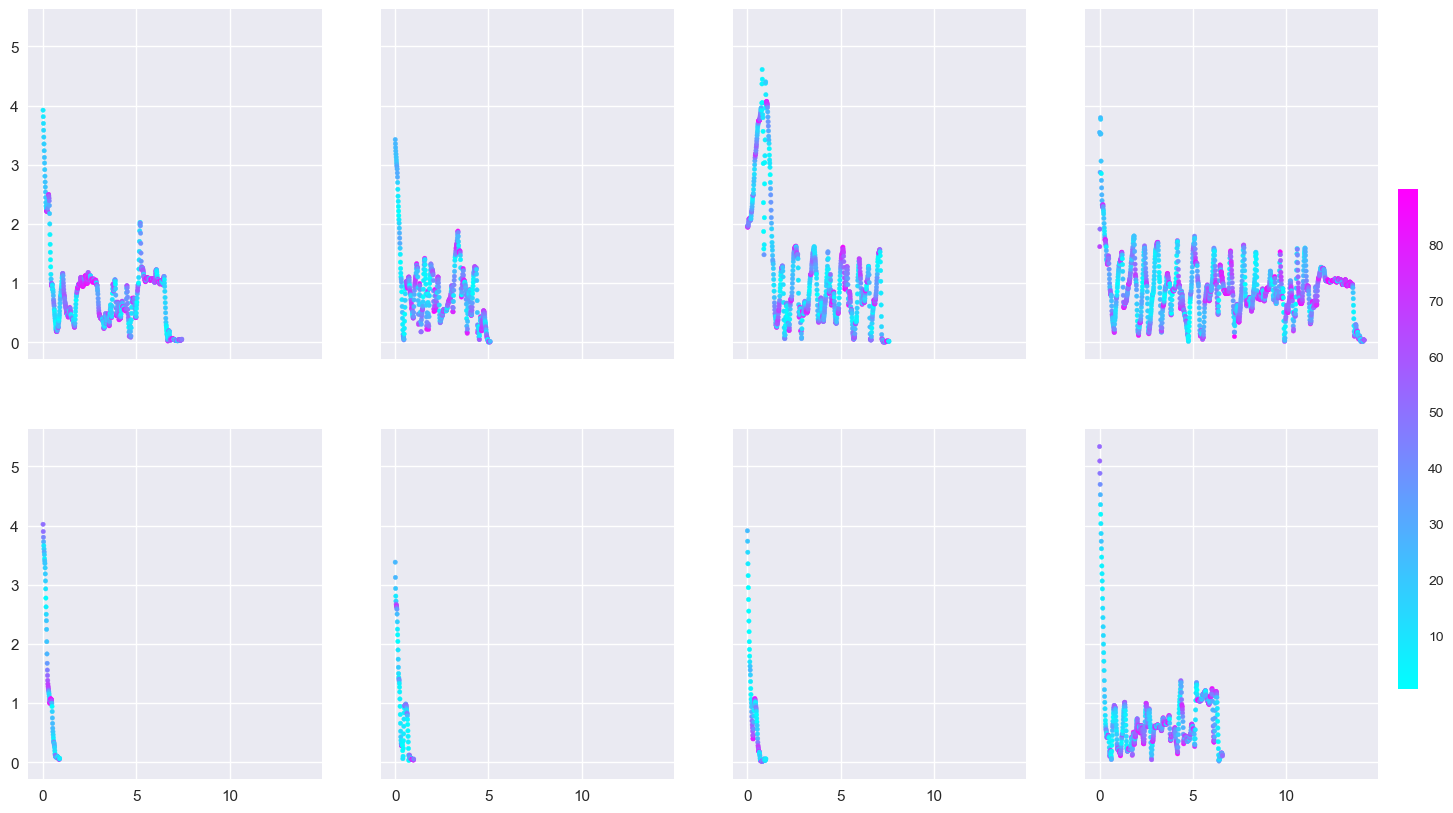

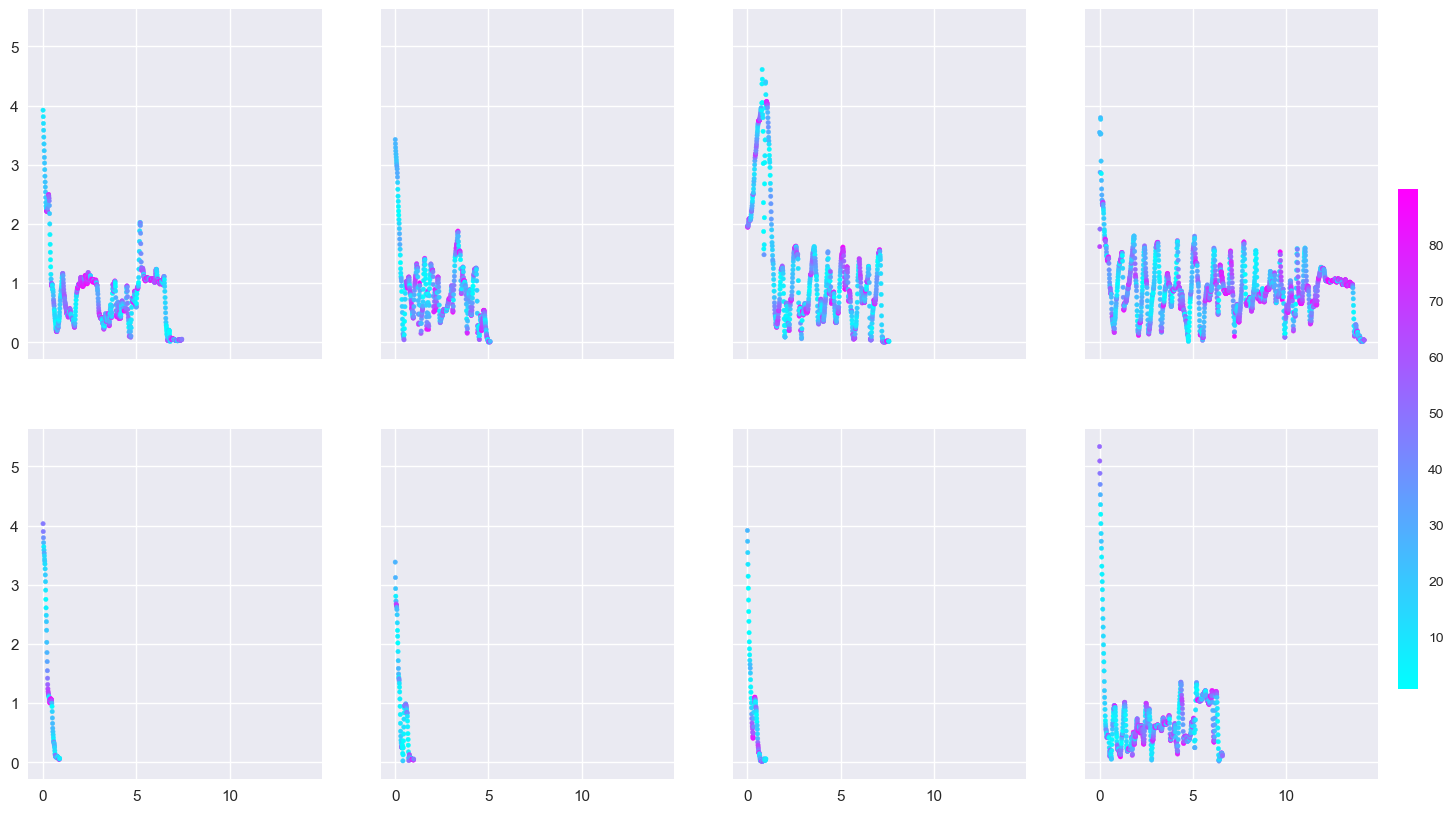

In [37]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    datalist = glob.glob(data_path + cutoff + '/**.csv')

    trial = ['first', 'last']

    plt.style.use('seaborn')

    fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)

    cc = 0
    for name in handpicked:
        path = [data for data in datalist if name in data]

        ii = 0
        for tt in trial:
            p = [x for x in path if tt in x][0]

            file = pd.read_csv(p)
            r = file.loc[:,'radial distance savgol'].values
            t0 = np.arange(len(r))*1/100
            blu = ax[ii, cc].scatter(t0, r, s = 10,
                            c = file.loc[:,'angle_savgol'].values,
                            cmap = plt.cm.cool)
            ax[ii, cc].tick_params(axis='both', which='major', labelsize=11)
            ii+=1
        cc+=1

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.2, 0.01, 0.5])
    fig.colorbar(blu, cax = cbar_ax)

    fig.savefig(fig_path + cutoff + '/radialSweepsAngleAllFlowers.png')

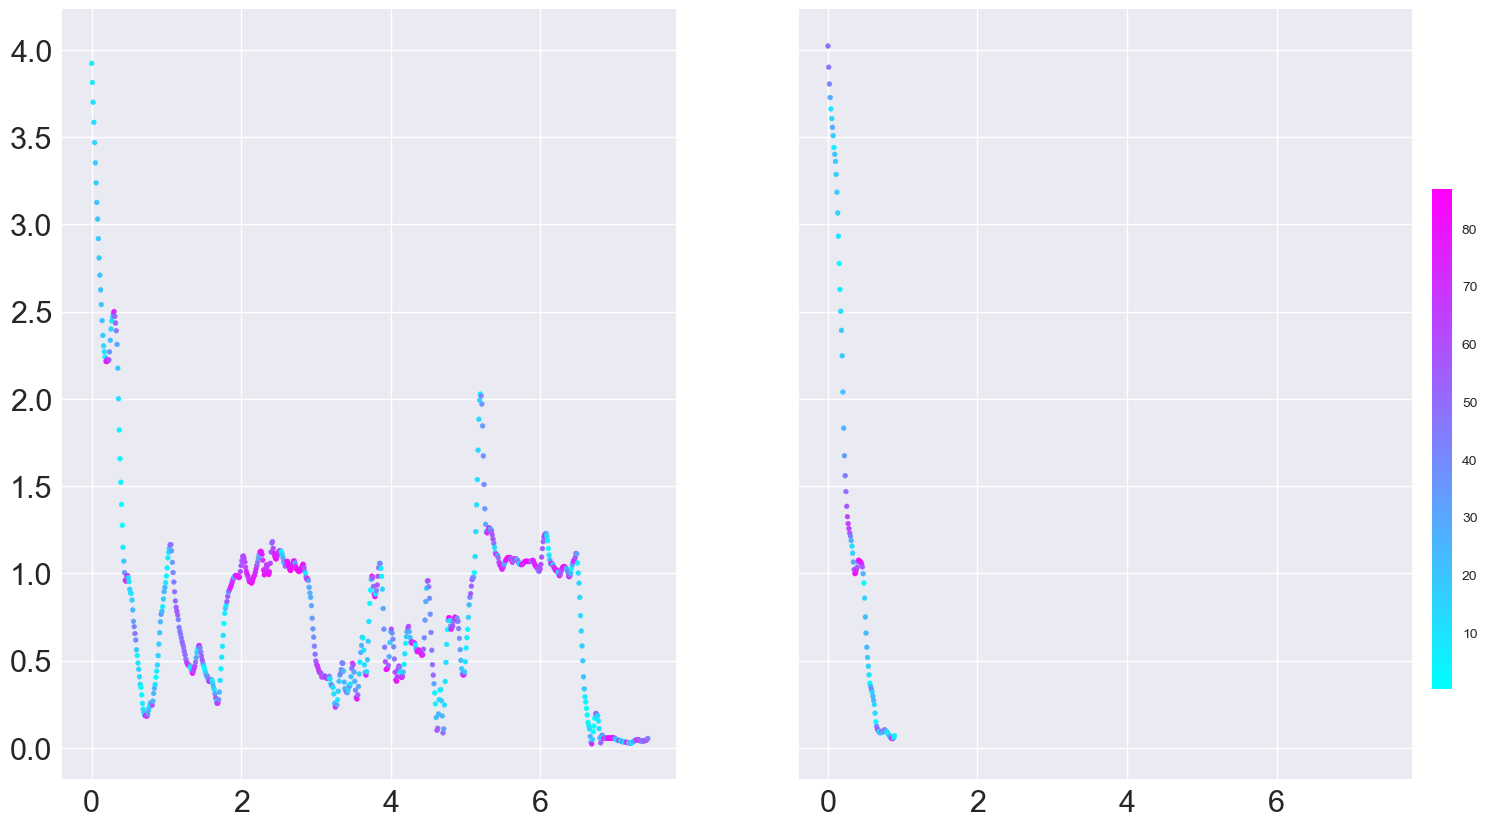

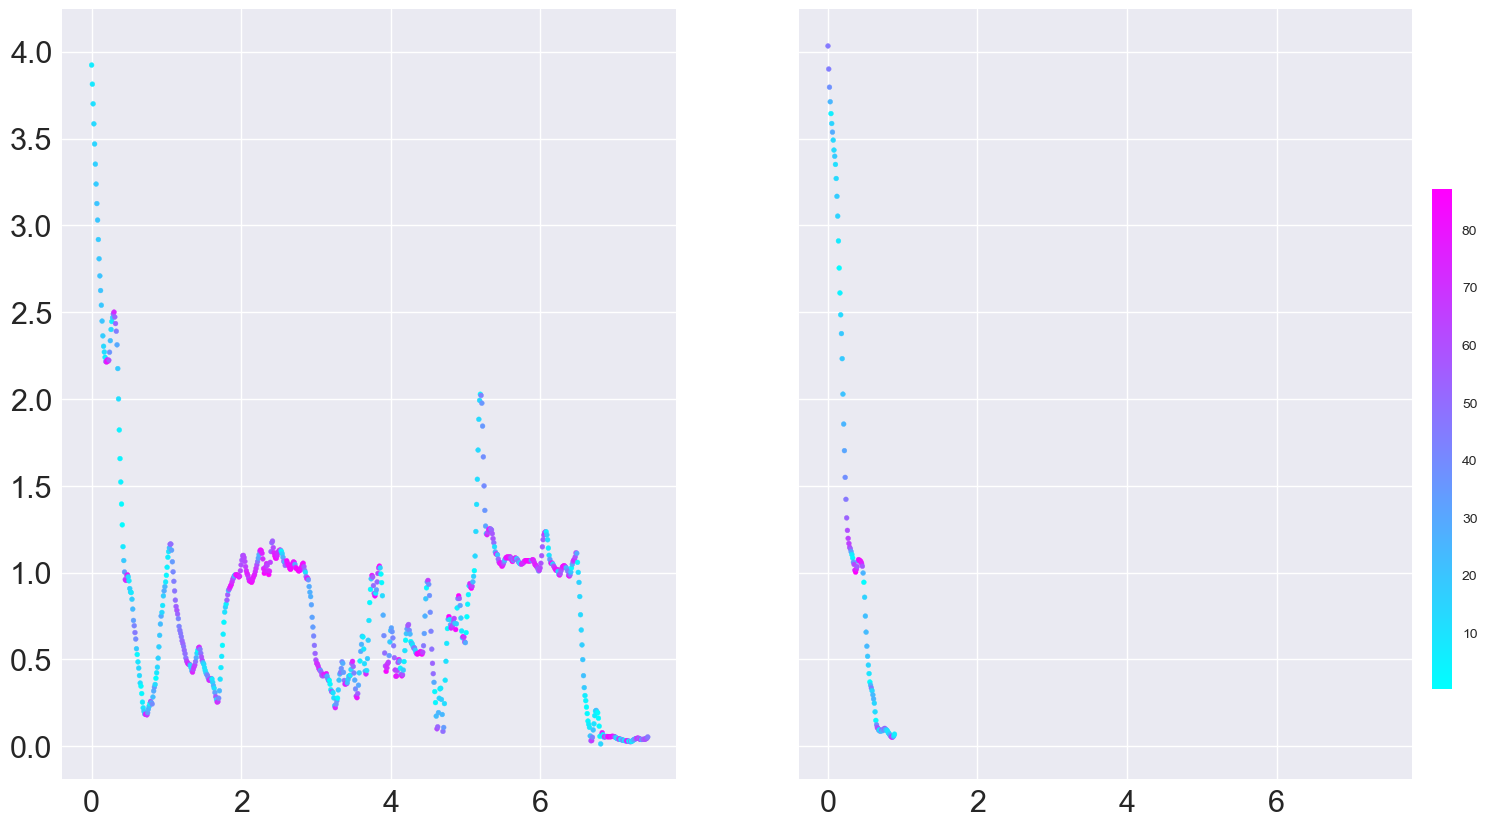

In [38]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    datalist = glob.glob(data_path + cutoff + '/**.csv')    
    
    trial = ['first', 'last']

    fig, ax = plt.subplots(1,2, figsize = (20,10), sharex = True, sharey = True)

    cc = 0
    for name in handpicked[0:1]:
        path = [data for data in datalist if name in data]

        ii = 0
        for tt in trial:
            p = [x for x in path if tt in x][0]

            file = pd.read_csv(p)
            r = file.loc[:,'radial distance savgol'].values
            t0 = np.arange(len(r))*1/100
            blu = ax[ii].scatter(t0, r, s = 12,
                            c = file.loc[:,'angle_savgol'].values,
                            cmap = plt.cm.cool)
            ax[ii].tick_params(axis='both', which='major', labelsize=22)
            ii+=1
        cc+=1
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.2, 0.01, 0.5])
    fig.colorbar(blu, cax = cbar_ax)

    fig.savefig(fig_path + cutoff +'/radialSweepsAnglec-1Example.png')

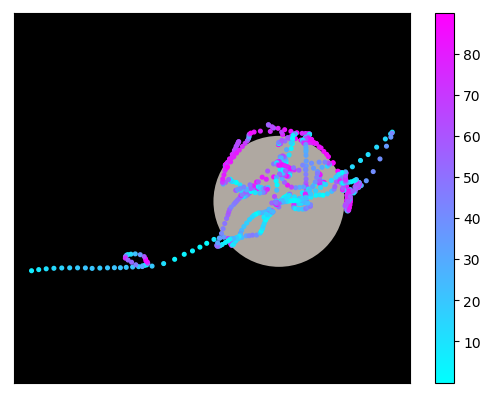

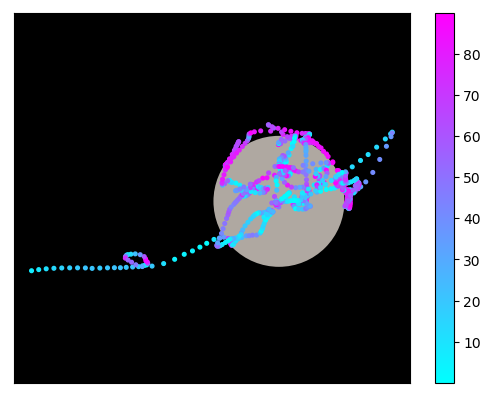

In [34]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    datalist = glob.glob(data_path + cutoff + '/**.csv')        
    
    name = handpicked[0:1][0]
    circ_r = circ_parameters.loc[circ_parameters.name == name, 'circ_radii'].values

    path = [data for data in datalist if name in data]
    p = [x for x in path if 'first' in x][0]
    file = pd.read_csv(p)

    x_gauss = file.loc[:, 'x_savgol'].values
    y_gauss = file.loc[:, 'y_savgol'].values
    angle = file.loc[:,'angle_savgol'].values

    f1 = angleCorloredTrajectory(x_gauss, y_gauss, circ_r, angle)
    f1.savefig(fig_path + cutoff + '/AngleColoredTrajectory_c1Example.svg')